# Weight Initializations

## Zeros Are Bad
In general we should never initialize the weights of our network to be all zeros.

$$
W = \vec{0}
$$

Because when the network starts training, all neurons are practically doing same thing and all weights will receive identical updates, which greatly reduces the power of a neural network.

## Normally Distributed
One of the naive approaches is to use small randoms that are normally distributed, e.g. guassian random numbers with zero mean and $10^{-2}$ standard deviations


```python
W = 0.01 * np.random.randn(fan_in, fan_out)
```

Glossary: `fan_in` is the a term that defines the maximum number of inputs that a system can accept. `fan_out` is a term that defines the maximum number of inputs that the output of a system can feed to other systems. 

In [1]:
import numpy as np
from weight_init.experiment import forward_prop

hidden_layer_sizes = [500] * 10

def small_random_init(fan_in, fan_out):
    return 0.01 * np.random.randn(fan_in, fan_out)

hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, small_random_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))

Hidden layer 1 had mean -0.000121 and std 0.213471
Hidden layer 2 had mean 0.000073 and std 0.047744
Hidden layer 3 had mean 0.000010 and std 0.010663
Hidden layer 4 had mean 0.000001 and std 0.002377
Hidden layer 5 had mean -0.000001 and std 0.000533
Hidden layer 6 had mean 0.000000 and std 0.000120
Hidden layer 7 had mean -0.000000 and std 0.000027
Hidden layer 8 had mean -0.000000 and std 0.000006
Hidden layer 9 had mean -0.000000 and std 0.000001
Hidden layer 10 had mean -0.000000 and std 0.000000


Notice that when we have a 10-layer deep network, all activations approach zero at the end with this set of initialization. Well, how about increase the standard deviation?

Hidden layer 1 had mean -0.001090 and std 0.981929
Hidden layer 2 had mean 0.002052 and std 0.981658
Hidden layer 3 had mean -0.002594 and std 0.981834
Hidden layer 4 had mean -0.000156 and std 0.981665
Hidden layer 5 had mean 0.000234 and std 0.981690
Hidden layer 6 had mean -0.000716 and std 0.981558
Hidden layer 7 had mean 0.002164 and std 0.981779
Hidden layer 8 had mean 0.000177 and std 0.981635
Hidden layer 9 had mean -0.003321 and std 0.981700
Hidden layer 10 had mean 0.001071 and std 0.981527


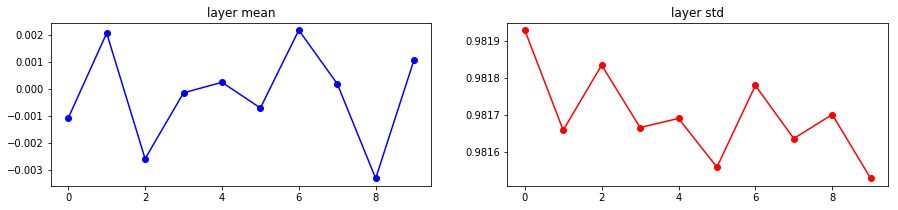

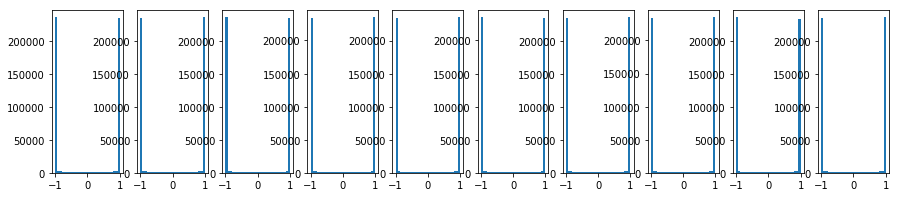

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,3)


def big_random_init(fan_in, fan_out):
    return 1 * np.random.randn(fan_in, fan_out)

hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, big_random_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))
    
# Plot the results
plt.figure()
plt.subplot(121)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distribution
plt.figure()
for i, H in hidden_layer_acts.items():
    plt.subplot(1, len(hidden_layer_acts), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

Notice that almost all neurons completely saturated to either -1 or 1 in every layer. This means gradients will be all zero and we won't be able to perform any learning on this network.

## Xavier Initialization
So what is this saying? Normally random distributed numbers do not work with deep learning weight initialization. A good rule of thumb is to try Xaiver initialization from the paper *Xiaver Initialization (Glorot et al. 2010)*. 

```python
W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) 
```

Hidden layer 1 had mean 0.000105 and std 0.628531
Hidden layer 2 had mean -0.000868 and std 0.485856
Hidden layer 3 had mean 0.000394 and std 0.407851
Hidden layer 4 had mean 0.000466 and std 0.357675
Hidden layer 5 had mean -0.000133 and std 0.321055
Hidden layer 6 had mean 0.000486 and std 0.294206
Hidden layer 7 had mean 0.000141 and std 0.272173
Hidden layer 8 had mean 0.000501 and std 0.255200
Hidden layer 9 had mean 0.000222 and std 0.239305
Hidden layer 10 had mean -0.000199 and std 0.226953


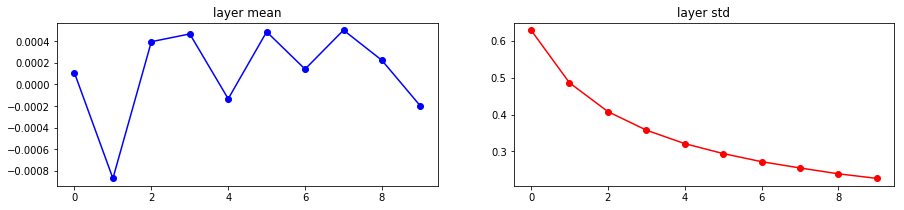

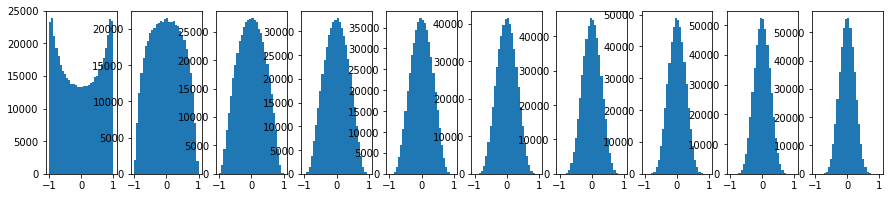

In [3]:
def xavier_init(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)

hidden_layer_acts, hidden_layer_means, hidden_layer_stds = forward_prop(hidden_layer_sizes, xavier_init)

for i, H in hidden_layer_acts.items():
    print('Hidden layer %d had mean %f and std %f' % (i + 1, hidden_layer_means[i], hidden_layer_stds[i]))
    
# Plot the results
plt.figure()
plt.subplot(121)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(hidden_layer_acts.keys()), hidden_layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distribution
plt.figure()
for i, H in hidden_layer_acts.items():
    plt.subplot(1, len(hidden_layer_acts), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

plt.show()

Now everything is nice and normally distributed!